In [130]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [131]:
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('churn.csv')
df.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4001,7446-KQISO,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.75,4900.65,No
1390,8039-ACLPL,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,No,No,Yes,Two year,No,Credit card (automatic),68.75,4888.2,No
1244,2223-KAGMX,Female,0,No,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.40,289.3,Yes
5544,9572-MTILT,Male,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,106.75,6252.9,Yes
3791,3453-RTHJQ,Male,0,No,No,6,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.10,435,No


In [132]:
df.shape

(7043, 21)

In [133]:
# checking missing Value

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [134]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [135]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [136]:
df.drop('customerID',axis='columns',inplace=True)  # drop CustomerID


In [137]:
df.TotalCharges.values # dtype str convert to number

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [138]:
#convert to number
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()



0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [139]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [140]:
df.shape

(7043, 20)

In [141]:
df.iloc[488].TotalCharges

' '

In [142]:
df1=df[df.TotalCharges!=' ']#Remove rows with space in TotalCharges

df1.shape


(7032, 20)

In [143]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [144]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


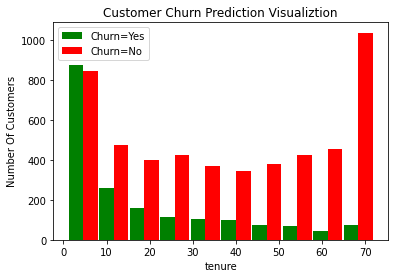

In [145]:
#Data Visualization
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

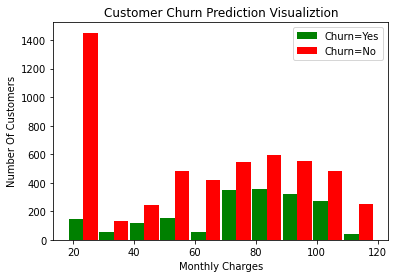

In [146]:
monthly_charge_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
monthly_charge_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([monthly_charge_churn_yes, monthly_charge_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [147]:
#checking unique column value with yes or no
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [148]:
#no internet service or no phone service replacing with No

df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [149]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [150]:
# encoding Yes and No to 1 or 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)
for col in df1:
    print(f'{col}: {df1[col].unique()}') 



gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [151]:
#one hot encoding 
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df1.gender.unique()
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [152]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1671,0,0,1,1,66,1,0,1,1,1,...,0,1,0,0,1,0,1,0,0,0
565,0,0,1,1,71,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
685,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2156,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1269,0,0,1,1,62,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [153]:
#Normalization

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [154]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [155]:
#Train test split
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)


In [156]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [157]:
X_train.shape,X_test.shape

((5625, 26), (1407, 26))

In [158]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [159]:
# Building ANN with tensorflow and keras
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [160]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
  model=keras.Sequential([
    keras.layers.Dense(26,input_dim=26,activation='relu'), # 1st hidden layer
    keras.layers.Dense(15,activation='relu'), # 2nd hidden layer
    keras.layers.Dense(8,activation='relu'), # 3rd hidden layer
    keras.layers.Dense(1,activation='sigmoid')# output layer
    ])
  model.compile(loss=loss,optimizer='adam',metrics=['accuracy'])
  if weights == -1:
        model.fit(X_train, y_train, epochs=100)
  else:
    model.fit(X_train, y_train, epochs=100, class_weight = weights)
  print(model.evaluate(X_test, y_test))
  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)
  print("Classification Report: \n", classification_report(y_test, y_preds))
  return y_preds

In [161]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5216 - accuracy: 0.7324
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4399 - accuracy: 0.7669
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4253 - accuracy: 0.7973
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4200 - accuracy: 0.7972
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8023
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.7993
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8032
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8052
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8043
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4087 - accura

In [162]:
##Undersampling
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [163]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [164]:
#Train test split
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [165]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [166]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6098 - accuracy: 0.7214
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7669
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4815 - accuracy: 0.7719
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7726
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.7732
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.7749
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.7786
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.7813
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.7813
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.7809
Epoch 11/

In [167]:
##Oversampling
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [168]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [169]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [170]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5941 - accuracy: 0.6953
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5422 - accuracy: 0.7596
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5220 - accuracy: 0.7642
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5063 - accuracy: 0.7696
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4945 - accuracy: 0.7747
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4836 - accuracy: 0.7809
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7805
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7840
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.7877
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4560 - accura

In [171]:
#SMOTE
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [176]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [178]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [179]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5504 - accuracy: 0.7381
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4749 - accuracy: 0.7738
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4666 - accuracy: 0.7748
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4604 - accuracy: 0.7791
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4540 - accuracy: 0.7835
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.7866
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.7873
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7896
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7946
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4333 - accura

In [180]:
#Use of Ensemble with undersampling
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [184]:
y_train.value_counts()


0    4130
1    1495
Name: Churn, dtype: int64

In [185]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [186]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [187]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [189]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [190]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6281 - accuracy: 0.7003
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5233 - accuracy: 0.7599
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.7686
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7732
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7719
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7766
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7719
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7742
Epoch 11/

In [191]:

X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6374 - accuracy: 0.6177
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7468
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7595
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7635
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7662
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7679
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7699
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7659
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7712
Epoch 11/

In [192]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6087 - accuracy: 0.7101
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7647
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7693
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7712
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7704
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7784
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7825
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7780
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7852
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.7841
Epoch 11/

In [193]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [194]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.70      0.79      1033
           1       0.48      0.75      0.59       374

    accuracy                           0.72      1407
   macro avg       0.68      0.73      0.69      1407
weighted avg       0.78      0.72      0.73      1407

